### Current Process
1. Read in data --> Done

2. Custom Imputation --> Done

3. Aggregate Data --> Not Done Yet

4. Add Binary Class --> Done, Should Add Binary Class Later

5. Summary Statistics Features --> Done

6. Wrapper Functions --> Done, Need to Test Though

7. Sklearn Pipeline Categorical Features --> One Hot Encoding Done

8. Sklearn Pipeline Numerical Features --> StandardScaler Done

9. Create Lagged Features --> Done

10. Modeling --> Currently XgBoost, (Maybe Try: TensorFlow Decision Tree, TensorFlow Probability Model)

11. Model Evaluation --> Accuracy, Precision, Recall, F1, Confusion Matrix (Need to add Variable Importance Based on Variance)

12. PySpark: XGBoost Classification Feature Importance

In [1]:
from Input_Variables.read_vars import raw_data_storage, \
                                      daily_stats_features_lower, daily_stats_features_upper, \
                                      ml_models_train_split, ml_models_test_split, model_storage_location, \
                                      time_series_lag_values_created

from Data_Schema.schema import Pandas_UDF_Data_Schema
from Read_In_Data.read_data import Reading_Data
from Data_Pipeline.sklearn_pipeline import Sklearn_Pipeline
from Feature_Generation.create_binary_labels import Create_Binary_Labels
from Feature_Generation.summary_stats import Summary_Stats_Features
from Feature_Generation.lag_features import Create_Lagged_Features
from Model_Creation.xgboost_model import XGBoost_Classification
from Model_Evaluation.classification_evaluation import Classification_Evalaution_Metrics
from Model_Plots.xgboost_classification_plots import XGBoost_Classification_Plot

# General Modules

In [2]:
# PySpark UDF Schema Activation
pandas_udf_data_schema=Pandas_UDF_Data_Schema()

# Data Location
reading_data=Reading_Data(data_location=raw_data_storage)

# Create Binary y Variables
create_binary_labels=Create_Binary_Labels()

# Sklearn Pipeline
pandas_sklearn_pipeline=Sklearn_Pipeline()

# Features Daily Stats Module
summary_stats_features=Summary_Stats_Features()

# Features Lagged Value
create_lag_features=Create_Lagged_Features()

# XGBoost Model Module
xgboost_classification=XGBoost_Classification()

# Classification Evaluation
classification_evalaution_metrics=Classification_Evalaution_Metrics()

# Model Plots Feature Importance
xgboost_classification_plot=XGBoost_Classification_Plot()

# PySpark

### 1. PySpark: Reading In Data

In [3]:
####### PySpark
pyspark_df=reading_data.read_in_pyspark()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/04 07:29:08 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### 2. PySpark: Custom Imputation Pipeline

In [4]:
####### PySpark
pyspark_custom_imputation_schema=pandas_udf_data_schema.custom_imputation_pyspark_schema()
pyspark_custom_imputation_pipeline=pandas_sklearn_pipeline.pyspark_custom_imputation_pipeline(df=pyspark_df, 
                                                                                              output_schema=pyspark_custom_imputation_schema)
pyspark_custom_imputation_pipeline.show(1)

/Users/carlosmonsivais/Desktop/glucose-data-analysis/glucose_venv/lib/python3.10/site-packages/pyspark/sql/pandas/group_ops.py:98: UserWarning: It is preferred to use 'applyInPandas' over this API. This API will be deprecated in the future releases. See SPARK-28264 for more details.
  warnings.warn(


23/03/04 07:29:10 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
23/03/04 07:29:11 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: PostDate, IngestionDate, PostId, PostTime, PatientId, Stream, SequenceNumber, TransmitterNumber, ReceiverNumber, RecordedSystemTime, RecordedDisplayTime, RecordedDisplayTimeRaw, TransmitterId, TransmitterTime, GlucoseSystemTime, GlucoseDisplayTime, GlucoseDisplayTimeRaw, Value, Status, TrendArrow, TrendRate, IsBackFilled, InternalStatus, SessionStartTime
 Schema: PostDate, IngestionDate, PostID, PostTime, PatientId, Stram, SequenceNumber, TransmitterNumber, ReceiverNumber, RecordedSystemTime, RecordedDisplayTime, RecordedDisplayTimeRaw, TransmitterId, TransmitterTime, GlucoseSystemTime, GlucoseDisplayTime, GlucoseDisplayTimeRaw, Value, Status, TrendArrow, TrendRate, IsBackFilled, InternalStatus, SessionStartTime
Expec

+--------------------+-----+-------------------+------------------+--------+-------+
|           PatientId|Value| GlucoseDisplayTime|GlucoseDisplayDate|inserted|missing|
+--------------------+-----+-------------------+------------------+--------+-------+
|tHu8WPnIffml5CL+A...|111.0|2022-09-13 19:15:45|        2022-09-13|       0|      0|
+--------------------+-----+-------------------+------------------+--------+-------+
only showing top 1 row



/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inserted'] = 0
/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['missing'].iloc[missing_label] = 1
/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

### 3. PySpark Aggregate Data at Level

### 4. PySpark: Adding Binary Labels

In [5]:
pyspark_df_added_binary_labels=create_binary_labels.pyspark_binary_labels(df=pyspark_custom_imputation_pipeline, 
                                                                          lower=daily_stats_features_lower, 
                                                                          upper=daily_stats_features_upper)

pyspark_df_added_binary_labels.show(1)

23/03/04 07:29:12 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: PostDate, IngestionDate, PostId, PostTime, PatientId, Stream, SequenceNumber, TransmitterNumber, ReceiverNumber, RecordedSystemTime, RecordedDisplayTime, RecordedDisplayTimeRaw, TransmitterId, TransmitterTime, GlucoseSystemTime, GlucoseDisplayTime, GlucoseDisplayTimeRaw, Value, Status, TrendArrow, TrendRate, IsBackFilled, InternalStatus, SessionStartTime
 Schema: PostDate, IngestionDate, PostID, PostTime, PatientId, Stram, SequenceNumber, TransmitterNumber, ReceiverNumber, RecordedSystemTime, RecordedDisplayTime, RecordedDisplayTimeRaw, TransmitterId, TransmitterTime, GlucoseSystemTime, GlucoseDisplayTime, GlucoseDisplayTimeRaw, Value, Status, TrendArrow, TrendRate, IsBackFilled, InternalStatus, SessionStartTime
Expected: Stram but found: Stream
CSV file: file:///Users/carlosmonsivais/Desktop/capstone_data/ahr414_glucose_sample%20-%20ahr414_glucose_sample.csv


+--------------------+-----+-------------------+------------------+--------+-------+--------+
|           PatientId|Value| GlucoseDisplayTime|GlucoseDisplayDate|inserted|missing|y_Binary|
+--------------------+-----+-------------------+------------------+--------+-------+--------+
|tHu8WPnIffml5CL+A...|111.0|2022-09-13 19:15:45|        2022-09-13|       0|      0|       0|
+--------------------+-----+-------------------+------------------+--------+-------+--------+
only showing top 1 row



/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inserted'] = 0
/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['missing'].iloc[missing_label] = 1
/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

### 5. PySpark: Features: Summary Statistics

In [6]:
####### PySpark
pyspark_features_summary_stats_schema=pandas_udf_data_schema.summary_stats_schema()
pyspark_features_summary_stats=summary_stats_features.pyspark_summary_statistics(df=pyspark_df_added_binary_labels, 
                                                                                 output_schema=pyspark_features_summary_stats_schema, 
                                                                                 lower=daily_stats_features_lower, 
                                                                                 upper=daily_stats_features_upper)

pyspark_features_summary_stats.show(1)

23/03/04 07:29:14 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: PostDate, IngestionDate, PostId, PostTime, PatientId, Stream, SequenceNumber, TransmitterNumber, ReceiverNumber, RecordedSystemTime, RecordedDisplayTime, RecordedDisplayTimeRaw, TransmitterId, TransmitterTime, GlucoseSystemTime, GlucoseDisplayTime, GlucoseDisplayTimeRaw, Value, Status, TrendArrow, TrendRate, IsBackFilled, InternalStatus, SessionStartTime
 Schema: PostDate, IngestionDate, PostID, PostTime, PatientId, Stram, SequenceNumber, TransmitterNumber, ReceiverNumber, RecordedSystemTime, RecordedDisplayTime, RecordedDisplayTimeRaw, TransmitterId, TransmitterTime, GlucoseSystemTime, GlucoseDisplayTime, GlucoseDisplayTimeRaw, Value, Status, TrendArrow, TrendRate, IsBackFilled, InternalStatus, SessionStartTime
Expected: Stram but found: Stream
CSV file: file:///Users/carlosmonsivais/Desktop/capstone_data/ahr414_glucose_sample%20-%20ahr414_glucose_sample.csv


+--------------------+-----+-------------------+------------------+--------+-------+--------+------+---------+--------+-----+-----+---------+---------+
|           PatientId|Value| GlucoseDisplayTime|GlucoseDisplayDate|inserted|missing|y_Binary|Median|     Mean| Std Dev|  Max|  Min|AreaBelow|AreaAbove|
+--------------------+-----+-------------------+------------------+--------+-------+--------+------+---------+--------+-----+-----+---------+---------+
|tHu8WPnIffml5CL+A...|111.0|2022-09-13 19:15:45|        2022-09-13|       0|      0|       0| 204.0|198.17545|44.67156|256.0|109.0|      0.0|   1697.0|
+--------------------+-----+-------------------+------------------+--------+-------+--------+------+---------+--------+-----+-----+---------+---------+
only showing top 1 row



/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inserted'] = 0
/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['missing'].iloc[missing_label] = 1
/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

### 6. PySpark: Wrapper Functions

### 7. PySpark: Sklearn Categorical Pipeline in PySpark

In [7]:
####### PySpark
pyspark_categorical_schema=pandas_udf_data_schema.sklearn_pyspark_categorical_schema()
pyspark_transformations_categorical=pandas_sklearn_pipeline.pyspark_sklearn_pipeline_categorical(df=pyspark_features_summary_stats, 
                                                                                                 output_schema=pyspark_categorical_schema)
pyspark_transformations_categorical.show(1)

23/03/04 07:29:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: PostDate, IngestionDate, PostId, PostTime, PatientId, Stream, SequenceNumber, TransmitterNumber, ReceiverNumber, RecordedSystemTime, RecordedDisplayTime, RecordedDisplayTimeRaw, TransmitterId, TransmitterTime, GlucoseSystemTime, GlucoseDisplayTime, GlucoseDisplayTimeRaw, Value, Status, TrendArrow, TrendRate, IsBackFilled, InternalStatus, SessionStartTime
 Schema: PostDate, IngestionDate, PostID, PostTime, PatientId, Stram, SequenceNumber, TransmitterNumber, ReceiverNumber, RecordedSystemTime, RecordedDisplayTime, RecordedDisplayTimeRaw, TransmitterId, TransmitterTime, GlucoseSystemTime, GlucoseDisplayTime, GlucoseDisplayTimeRaw, Value, Status, TrendArrow, TrendRate, IsBackFilled, InternalStatus, SessionStartTime
Expected: Stram but found: Stream
CSV file: file:///Users/carlosmonsivais/Desktop/capstone_data/ahr414_glucose_sample%20-%20ahr414_glucose_sample.csv


/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inserted'] = 0
/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['missing'].iloc[missing_label] = 1
/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

+--------------------+-----+-------------------+------------------+--------+------+---------+--------+-----+-----+---------+---------+----------+----------+
|           PatientId|Value| GlucoseDisplayTime|GlucoseDisplayDate|y_Binary|Median|     Mean| Std Dev|  Max|  Min|AreaBelow|AreaAbove|  inserted|   missing|
+--------------------+-----+-------------------+------------------+--------+------+---------+--------+-----+-----+---------+---------+----------+----------+
|tHu8WPnIffml5CL+A...|111.0|2022-09-13 19:15:45|        2022-09-13|       0| 204.0|198.17545|44.67156|256.0|109.0|      0.0|   1697.0|[1.0, 0.0]|[1.0, 0.0]|
+--------------------+-----+-------------------+------------------+--------+------+---------+--------+-----+-----+---------+---------+----------+----------+
only showing top 1 row



### 8. PySpark: Sklearn Numerical Pipeline in PySpark

In [8]:
####### PySpark
pyspark_numerical_schema=pandas_udf_data_schema.sklearn_pyspark_numerical_schema()
pyspark_transformations_numerical=pandas_sklearn_pipeline.pyspark_sklearn_pipeline_numerical(df=pyspark_transformations_categorical, 
                                                                                             output_schema=pyspark_numerical_schema)
pyspark_transformations_numerical.show(1)

23/03/04 07:29:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: PostDate, IngestionDate, PostId, PostTime, PatientId, Stream, SequenceNumber, TransmitterNumber, ReceiverNumber, RecordedSystemTime, RecordedDisplayTime, RecordedDisplayTimeRaw, TransmitterId, TransmitterTime, GlucoseSystemTime, GlucoseDisplayTime, GlucoseDisplayTimeRaw, Value, Status, TrendArrow, TrendRate, IsBackFilled, InternalStatus, SessionStartTime
 Schema: PostDate, IngestionDate, PostID, PostTime, PatientId, Stram, SequenceNumber, TransmitterNumber, ReceiverNumber, RecordedSystemTime, RecordedDisplayTime, RecordedDisplayTimeRaw, TransmitterId, TransmitterTime, GlucoseSystemTime, GlucoseDisplayTime, GlucoseDisplayTimeRaw, Value, Status, TrendArrow, TrendRate, IsBackFilled, InternalStatus, SessionStartTime
Expected: Stram but found: Stream
CSV file: file:///Users/carlosmonsivais/Desktop/capstone_data/ahr414_glucose_sample%20-%20ahr414_glucose_sample.csv


/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inserted'] = 0
/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['missing'].iloc[missing_label] = 1
/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

+--------------------+----------+-------------------+------------------+---------+--------+-----------+----------+---------+----------+----------+--------+-------+--------+
|           PatientId|     Value| GlucoseDisplayTime|GlucoseDisplayDate|   Median|    Mean|    Std Dev|       Max|      Min| AreaBelow| AreaAbove|inserted|missing|y_Binary|
+--------------------+----------+-------------------+------------------+---------+--------+-----------+----------+---------+----------+----------+--------+-------+--------+
|tHu8WPnIffml5CL+A...|-0.8562785|2022-09-13 19:15:45|        2022-09-13|0.7810994|0.441126|-0.20950395|-0.3398663|0.2710541|-0.5424391|-0.7945769|  [1, 0]| [1, 0]|       0|
+--------------------+----------+-------------------+------------------+---------+--------+-----------+----------+---------+----------+----------+--------+-------+--------+
only showing top 1 row



### 9. PySpark: Lag Features

In [9]:
####### PySpark
pyspark_lag_features_creation=create_lag_features.pyspark_lag_features(df=pyspark_transformations_numerical,
                                                                       time_series_lag_values_created=time_series_lag_values_created)
pyspark_lag_features_creation.show(5)

23/03/04 07:29:18 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: PostDate, IngestionDate, PostId, PostTime, PatientId, Stream, SequenceNumber, TransmitterNumber, ReceiverNumber, RecordedSystemTime, RecordedDisplayTime, RecordedDisplayTimeRaw, TransmitterId, TransmitterTime, GlucoseSystemTime, GlucoseDisplayTime, GlucoseDisplayTimeRaw, Value, Status, TrendArrow, TrendRate, IsBackFilled, InternalStatus, SessionStartTime
 Schema: PostDate, IngestionDate, PostID, PostTime, PatientId, Stram, SequenceNumber, TransmitterNumber, ReceiverNumber, RecordedSystemTime, RecordedDisplayTime, RecordedDisplayTimeRaw, TransmitterId, TransmitterTime, GlucoseSystemTime, GlucoseDisplayTime, GlucoseDisplayTimeRaw, Value, Status, TrendArrow, TrendRate, IsBackFilled, InternalStatus, SessionStartTime
Expected: Stram but found: Stream
CSV file: file:///Users/carlosmonsivais/Desktop/capstone_data/ahr414_glucose_sample%20-%20ahr414_glucose_sample.csv


/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inserted'] = 0
/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['missing'].iloc[missing_label] = 1
/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

+--------------------+------------+-------------------+------------------+---------+----------+----------+----------+---------+----------+----------+--------+-------+--------+------------+------------+-----------+
|           PatientId|       Value| GlucoseDisplayTime|GlucoseDisplayDate|   Median|      Mean|   Std Dev|       Max|      Min| AreaBelow| AreaAbove|inserted|missing|y_Binary|       lag_1|       lag_2|      lag_3|
+--------------------+------------+-------------------+------------------+---------+----------+----------+----------+---------+----------+----------+--------+-------+--------+------------+------------+-----------+
|9Fob2bu+MwNd3P522...| 0.095350906|2022-09-13 19:54:19|        2022-09-13|0.2977872|0.12188119|-1.9436185|-0.9370756|1.3865052|-0.5424391|-1.0107465|  [1, 0]| [1, 0]|       1|  0.14896382|  0.17577028| 0.20257674|
|9Fob2bu+MwNd3P522...| 0.014931514|2022-09-13 19:59:18|        2022-09-13|0.2977872|0.12188119|-1.9436185|-0.9370756|1.3865052|-0.5424391|-1.010

### 10. PySpark: XGBoost Model

In [10]:
####### PySpark
pyspark_xgboost_classsification_schema=pandas_udf_data_schema.xgboost_classification_schema()

classification_model_outputs=xgboost_classification.pyspark_xgboost(df=pyspark_lag_features_creation, 
                                                                    output_schema=pyspark_xgboost_classsification_schema, 
                                                                    train_split=ml_models_train_split, 
                                                                    test_split=ml_models_test_split)

classification_model_outputs.show()

23/03/04 07:29:19 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: PostDate, IngestionDate, PostId, PostTime, PatientId, Stream, SequenceNumber, TransmitterNumber, ReceiverNumber, RecordedSystemTime, RecordedDisplayTime, RecordedDisplayTimeRaw, TransmitterId, TransmitterTime, GlucoseSystemTime, GlucoseDisplayTime, GlucoseDisplayTimeRaw, Value, Status, TrendArrow, TrendRate, IsBackFilled, InternalStatus, SessionStartTime
 Schema: PostDate, IngestionDate, PostID, PostTime, PatientId, Stram, SequenceNumber, TransmitterNumber, ReceiverNumber, RecordedSystemTime, RecordedDisplayTime, RecordedDisplayTimeRaw, TransmitterId, TransmitterTime, GlucoseSystemTime, GlucoseDisplayTime, GlucoseDisplayTimeRaw, Value, Status, TrendArrow, TrendRate, IsBackFilled, InternalStatus, SessionStartTime
Expected: Stram but found: Stream
CSV file: file:///Users/carlosmonsivais/Desktop/capstone_data/ahr414_glucose_sample%20-%20ahr414_glucose_sample.csv


/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inserted'] = 0
/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['missing'].iloc[missing_label] = 1
/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

23/03/04 07:29:20 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: PostDate, IngestionDate, PostId, PostTime, PatientId, Stream, SequenceNumber, TransmitterNumber, ReceiverNumber, RecordedSystemTime, RecordedDisplayTime, RecordedDisplayTimeRaw, TransmitterId, TransmitterTime, GlucoseSystemTime, GlucoseDisplayTime, GlucoseDisplayTimeRaw, Value, Status, TrendArrow, TrendRate, IsBackFilled, InternalStatus, SessionStartTime
 Schema: PostDate, IngestionDate, PostID, PostTime, PatientId, Stram, SequenceNumber, TransmitterNumber, ReceiverNumber, RecordedSystemTime, RecordedDisplayTime, RecordedDisplayTimeRaw, TransmitterId, TransmitterTime, GlucoseSystemTime, GlucoseDisplayTime, GlucoseDisplayTimeRaw, Value, Status, TrendArrow, TrendRate, IsBackFilled, InternalStatus, SessionStartTime
Expected: Stram but found: Stream
CSV file: file:///Users/carlosmonsivais/Desktop/capstone_data/ahr414_glucose_sample%20-%20ahr414_glucose_sample.csv


/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inserted'] = 0
/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['missing'].iloc[missing_label] = 1
/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

+--------------------+-------------------+-----------+------+-----------+-----------+
|           PatientId| GlucoseDisplayTime|Predictions|Actual|     Prob_0|     Prob_1|
+--------------------+-------------------+-----------+------+-----------+-----------+
|9Fob2bu+MwNd3P522...|2022-09-13 19:54:19|          1|     1|0.110791326|  0.8892087|
|9Fob2bu+MwNd3P522...|2022-09-13 19:59:18|          1|     1|0.110791326|  0.8892087|
|9Fob2bu+MwNd3P522...|2022-09-13 20:04:18|          1|     1| 0.04694134| 0.95305866|
|9Fob2bu+MwNd3P522...|2022-09-13 20:09:18|          1|     1| 0.04694134| 0.95305866|
|9Fob2bu+MwNd3P522...|2022-09-13 20:14:18|          0|     0|  0.7964419| 0.20355806|
|9Fob2bu+MwNd3P522...|2022-09-13 20:19:19|          1|     1| 0.04694134| 0.95305866|
|9Fob2bu+MwNd3P522...|2022-09-13 20:24:18|          0|     0|   0.929026|0.070974015|
|9Fob2bu+MwNd3P522...|2022-09-13 20:29:19|          0|     1|  0.7964419| 0.20355806|
|9Fob2bu+MwNd3P522...|2022-09-13 20:34:18|          1|

### 11. PySpark: Model Evaluation

In [11]:
####### PySpark
pyspark_classification_metric_schema=pandas_udf_data_schema.classification_metric_schema()

classification_metric_df=classification_evalaution_metrics.pyspark_classification_model_evaluation_metrics(df=classification_model_outputs, 
                                                                                                           output_schema=pyspark_classification_metric_schema)
classification_metric_df.show()                    

23/03/04 07:29:21 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: PostDate, IngestionDate, PostId, PostTime, PatientId, Stream, SequenceNumber, TransmitterNumber, ReceiverNumber, RecordedSystemTime, RecordedDisplayTime, RecordedDisplayTimeRaw, TransmitterId, TransmitterTime, GlucoseSystemTime, GlucoseDisplayTime, GlucoseDisplayTimeRaw, Value, Status, TrendArrow, TrendRate, IsBackFilled, InternalStatus, SessionStartTime
 Schema: PostDate, IngestionDate, PostID, PostTime, PatientId, Stram, SequenceNumber, TransmitterNumber, ReceiverNumber, RecordedSystemTime, RecordedDisplayTime, RecordedDisplayTimeRaw, TransmitterId, TransmitterTime, GlucoseSystemTime, GlucoseDisplayTime, GlucoseDisplayTimeRaw, Value, Status, TrendArrow, TrendRate, IsBackFilled, InternalStatus, SessionStartTime
Expected: Stram but found: Stream
CSV file: file:///Users/carlosmonsivais/Desktop/capstone_data/ahr414_glucose_sample%20-%20ahr414_glucose_sample.csv


/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inserted'] = 0
/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['missing'].iloc[missing_label] = 1
/Users/carlosmonsivais/Desktop/glucose-data-analysis/Data_Pipeline/fill_missing_data.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

+--------------------+-----------------------------+---------------+------------+----------+------------------+
|           PatientId|Classification_Accuracy_Score|Precision_Score|Recall_Score|  F1_Score|  Confusion_Matrix|
+--------------------+-----------------------------+---------------+------------+----------+------------------+
|9Fob2bu+MwNd3P522...|                    0.9396552|     0.94623655|   0.9777778|0.96174866|[[21, 5], [2, 88]]|
|iSFLmNjVJ3w4e4WcQ...|                    0.8869565|      0.7222222|  0.61904764| 0.6666667|[[89, 5], [8, 13]]|
|tHu8WPnIffml5CL+A...|                   0.98275864|          0.975|       0.975|     0.975|[[75, 1], [1, 39]]|
+--------------------+-----------------------------+---------------+------------+----------+------------------+



### 12. PySpark: XGBoost Classification Feature Importance

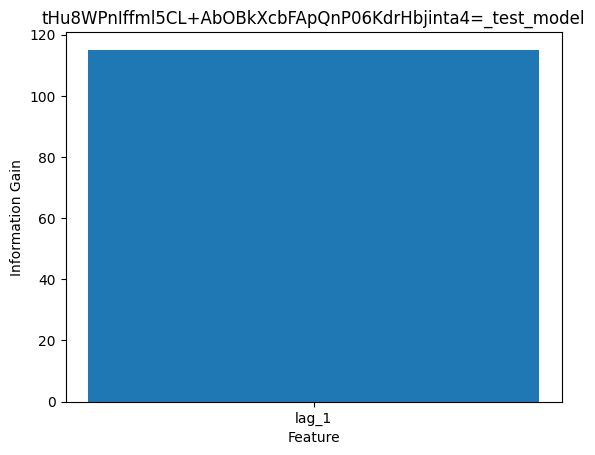

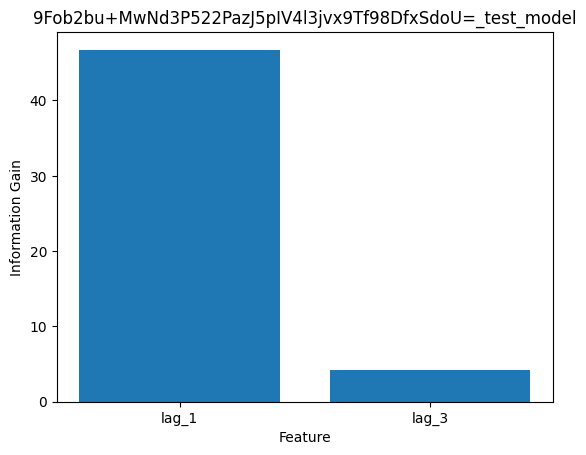

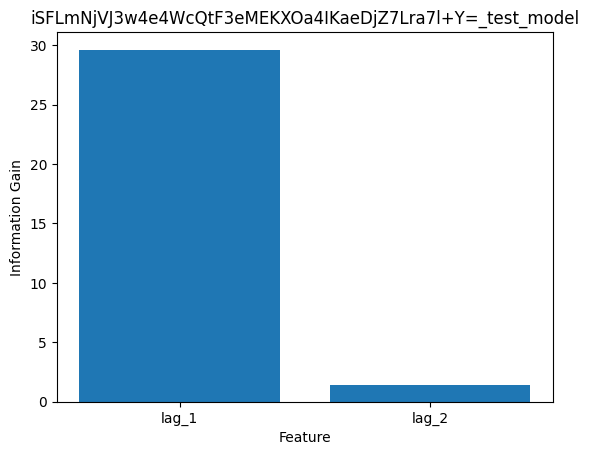

<Figure size 640x480 with 0 Axes>

In [12]:
xgboost_classification_plot.read_model_plot_variance(model_storage_location=model_storage_location)

# Pandas

### Pandas: Reading in Data

In [ ]:
####### Pandas
pandas_df=reading_data.read_in_pandas()
pandas_df.head(1)

### Pandas: Custom Imputation Pipeline

In [ ]:
####### Pandas
pandas_custom_imputation_pipeline=pandas_sklearn_pipeline.pandas_custom_imputation_pipeline(df=pandas_df)
pandas_custom_imputation_pipeline.head(1)

### Pandas: Aggregate Data at Level

### Pandas: Adding Binary Labels

In [ ]:
pandas_df_added_binary_labels=create_binary_labels.pandas_binary_labels(df=pandas_custom_imputation_pipeline, 
                                                                        lower=daily_stats_features_lower, 
                                                                        upper=daily_stats_features_upper)
pandas_df_added_binary_labels.head(1)

### Pandas: Features: Summary Statistics

In [ ]:
pandas_features_summary_stats=summary_stats_features.pandas_compressDailyValues(data=pandas_df_added_binary_labels, 
                                                                                lower=daily_stats_features_lower, 
                                                                                upper=daily_stats_features_upper)
pandas_features_summary_stats.head(1)

### Pandas: Wrapper Functions

### Pandas: Sklearn Categorical Pipeline in Pandas

In [ ]:
####### Pandas
pandas_custom_categorical_pipeline=pandas_sklearn_pipeline.pandas_transform_categorical_features(df=pandas_features_summary_stats)
pandas_custom_categorical_pipeline.head(1)

### Pandas: Sklearn Numerical Pipeline in Pandas

In [ ]:
####### Pandas
pandas_custom_numerical_pipeline=pandas_sklearn_pipeline.pandas_transform_numerical_features(df=pandas_custom_categorical_pipeline)
pandas_custom_numerical_pipeline.head(1)

### Pandas: Models